In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
chun_df = pd.read_csv('data/Churn_Predictions.csv')
chun_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
chun_df.shape

(10000, 14)

In [51]:
chun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [52]:
chun_df['Exited'].unique()

array([1, 0])

In [53]:
chun_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

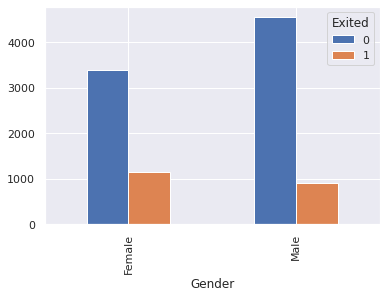

In [54]:
pd.crosstab(chun_df['Gender'], chun_df['Exited']).plot(kind='bar')

In [55]:
chun_df[(chun_df['Geography'] =='France') &(chun_df['Exited'])].shape[0]

810

In [56]:
chun_df[chun_df['Geography'] == 'France'].shape[0]

5014

In [57]:
chun_df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

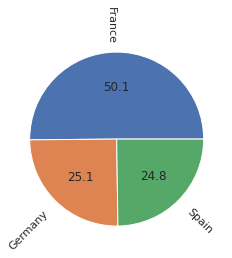

In [58]:
plt.pie(chun_df['Geography'].value_counts(),
       autopct='%1.1f',
       labels=['France', 'Germany', 'Spain'],
       rotatelabels=True);

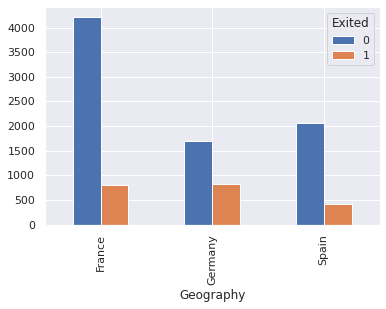

In [59]:
pd.crosstab(chun_df['Geography'], chun_df['Exited']).plot(kind='bar')

In [60]:
chun_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [62]:
chun_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
X = chun_df.iloc[:, 3:-1].values
y = chun_df.iloc[:, -1].values

In [65]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [66]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding Categorical Variables

In [4]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


Using OneHotEncoder to transform the Geography features.

In [5]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [73]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train[:10]

array([[ 1.00150113, -0.57946723, -0.57638802,  0.35649971,  0.91324755,
        -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,  0.64920267,
         0.97481699,  1.36766974],
       [-0.99850112,  1.72572313, -0.57638802, -0.20389777,  0.91324755,
         0.29493847, -0.3483691 ,  0.69683765,  0.80843615,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.99850112, -0.57946723,  1.73494238, -0.96147213,  0.91324755,
        -1.41636539, -0.69539349,  0.61862909, -0.91668767,  0.64920267,
        -1.02583358, -0.25280688],
       [ 1.00150113, -0.57946723, -0.57638802, -0.94071667, -1.09499335,
        -1.13114808,  1.38675281,  0.95321202, -0.91668767,  0.64920267,
        -1.02583358,  0.91539272],
       [ 1.00150113, -0.57946723, -0.57638802, -1.39733684,  0.91324755,
         1.62595257,  1.38675281,  1.05744869, -0.91668767, -1.54035103,
        -1.02583358, -1.05960019],
       [ 1.00150113, -0.57946723, -0.57638802, -0.85769482,  0.91324755,
         0.19986603, -

In [8]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=6, activation='relu'))

model.add(tf.keras.layers.Dense(units=6, activation='relu'))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 13s 14ms/step - loss: 0.5816 - accuracy: 0.7314
Epoch 2/100
250/250 [==============================] - 4s 15ms/step - loss: 0.4928 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 4s 15ms/step - loss: 0.4684 - accuracy: 0.7945
Epoch 4/100
250/250 [==============================] - 2s 9ms/step - loss: 0.4513 - accuracy: 0.7945
Epoch 5/100
250/250 [==============================] - 2s 10ms/step - loss: 0.4371 - accuracy: 0.7962
Epoch 6/100
250/250 [==============================] - 5s 21ms/step - loss: 0.4262 - accuracy: 0.8102
Epoch 7/100
250/250 [==============================] - 4s 15ms/step - loss: 0.4173 - accuracy: 0.8202
Epoch 8/100
250/250 [==============================] - 5s 22ms/step - loss: 0.4094 - accuracy: 0.8226
Epoch 9/100
250/250 [==============================] - 3s 11ms/step - loss: 0.4015 - accuracy: 0.8240
Epoch 10/100
250/250 [==============================] - 3s 11ms/step - loss: 0.392

In [15]:
loss = history.history["loss"]
acc = history.history["accuracy"]

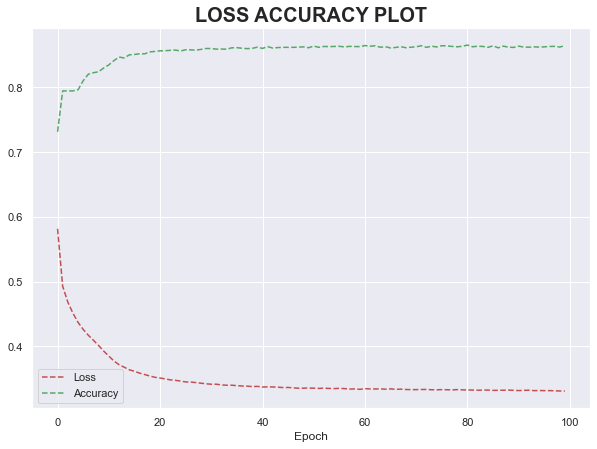

In [22]:
plt.figure(figsize=(10,7))
plt.plot(loss, "r--", label="Loss")
plt.plot(acc, "g--", label="Accuracy")
plt.title("loss accuracy plot".upper(), size=20, weight="bold")
plt.xlabel("Epoch")
plt.legend();
plt.savefig("loss accuracy plot.png", bbox_inches="tight", format="png")

In [86]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

63/63 [==============================] - 0s 6ms/step - loss: 0.3361 - accuracy: 0.8670
0.8669999837875366


Making the prediction to determine if the customer stays or leave the bank. 

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 800

Gender: Male

Age: 40 years old

Tenure: 6 years

Balance: $ 650000

Number of Products: 4

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

So, should we say goodbye to that customer?

In [89]:
print(model.predict(sc.transform([[1, 0, 0, 800, 1, 40, 6, 650000, 4, 1, 1, 50000]]))>0.5)

[[False]]


From, the above information provided, we are not expecting this customer to leave the bank.

In [91]:
#making the prediction variable
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 1]
 [0 1]]


Making the confusion matrix

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[1554  213]
 [  53  180]]


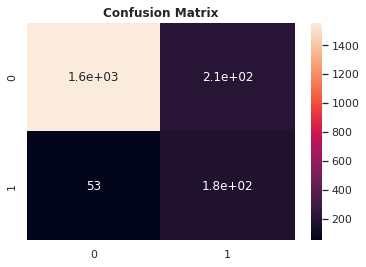

In [93]:
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix', fontweight='bold')
sns.heatmap(cm,
            annot=True)
plt.show()

### Save and Load the Model

In [95]:
import pickle

In [96]:
with open('/content/drive/MyDrive/Customer_chun/Model/chun_model', 'wb') as f:
  pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://ef0a8a99-f597-4573-ac00-295810406e77/assets


In [97]:
with open('/content/drive/MyDrive/Customer_chun/Model/chun_model', 'rb') as f:
  model = pickle.load(f)

In [99]:
print(model.predict(sc.transform([[1,0, 0, 800, 1, 40, 6, 650000, 4, 1, 1, 50000]]))>0.5)

[[False]]


Hence, our model is ready for deployment!!!